In [144]:
# Objective for this assignment is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

In [145]:
%matplotlib inline

In [146]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats 

# Hide warning messages in notebook. This was provided in the starter file. 
import warnings
warnings.filterwarnings('ignore')

In [147]:
# Note to self: clinicaltrial_data.csv has 4 columns. Mouse Id, Timepoint,Tumor Volume and Metastatic Sites. 1893 observations. 
# And mouse_drug_data.csv has 2 columns. Mouse Id and Drug. The drugs are NOT just Capomulin, Infubinol, Ketapril, and Placebo! 
# SO at some stage, pick these 4 drugs for the analysis
#There are 10 in all. 250 observations.  

# Files to Load: Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("Resources/mouse_drug_data.csv")
clinical_trial = pd.read_csv("Resources/clinicaltrial_data.csv")

# Combine the data into a single dataset. For this use the Mouse ID as the unique identifier. 
mouse_clinical_combine = pd.merge(clinical_trial, mouse_drug,how='outer', on="Mouse ID")

# Display the data table for preview
mouse_clinical_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [148]:
#Aside: Get a description of the combined dataset. 
mouse_clinical_combine.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [173]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
combine_group_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_group_mean)

# Preview DataFrame 
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [174]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_group_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_sem_tumorvol_df = pd.DataFrame(combine_group_sem)

# Preview DataFrame 
tumor_response_sem_tumorvol_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [188]:
#DataFrame.pivot(index=None, columns=None, values=None)[source]
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [176]:
table_fourdrugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


In [177]:
#Collect the y- errors for the four focus drugs to use in the error plot

Capomulin_error_df=tumor_response_sem_tumorvol_df.loc['Capomulin',["Tumor Volume (mm3)"]]
Capomulin_error=Capomulin_error_df.iloc[:, 0].values


Infubinol_error_df=tumor_response_sem_tumorvol_df.loc['Infubinol',["Tumor Volume (mm3)"]]
Infubinol_error=Infubinol_error_df.iloc[:, 0].values


Ketapril_error_df=tumor_response_sem_tumorvol_df.loc['Ketapril',["Tumor Volume (mm3)"]]
Ketapril_error=Ketapril_error_df.iloc[:, 0].values


Placebo_error_df=tumor_response_sem_tumorvol_df.loc['Placebo',["Tumor Volume (mm3)"]]
Placebo_error=Placebo_error_df.iloc[:, 0].values


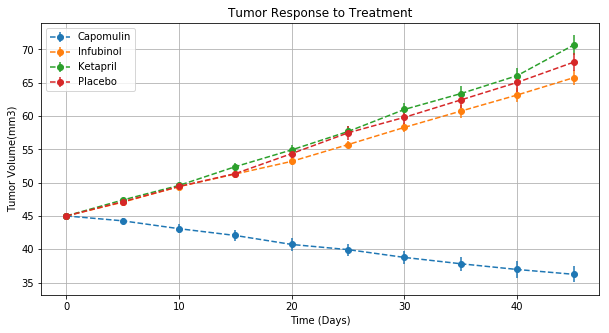

In [178]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Capomulin'], yerr=Capomulin_error, linestyle="--", fmt='o')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Infubinol'], yerr=Infubinol_error, linestyle="--", fmt='o')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Ketapril'], yerr=Ketapril_error, linestyle="--",fmt='o')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Placebo'], yerr=Placebo_error, linestyle="--", fmt='o')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend()       
plt.show()

## Metastatic Response to Treatment

In [183]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_group_mean_met= mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()
combine_group_mean_met.reset_index(level = None, inplace = True)

# Convert to DataFrame
# Preview DataFrame 
tumor_response_mean_met_df = pd.DataFrame(combine_group_mean_met)

# Preview DataFrame 
tumor_response_mean_met_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [185]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_group_met_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()
combine_group_met_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_sem_met_df = pd.DataFrame(combine_group_sem)

# Preview DataFrame
tumor_response_sem_met_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [186]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_table_met = tumor_response_mean_met_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table_met.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [159]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [160]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [161]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [162]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [163]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [164]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'